In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=100,n_features=3,centers=2,random_state=101)

In [5]:
tuple(data)

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [6]:
data[0]

array([[  0.99429187,   0.87511711,  -9.99909683],
       [  0.65761885,   0.91624771, -10.18458517],
       [ -6.48804352,   3.29034852,   6.73159871],
       [  0.5815206 ,   2.06249948,  -9.07157495],
       [ -7.42442678,   5.30835517,   6.86341624],
       [  2.26790487,   0.40816482, -10.17230518],
       [  1.62073713,  -0.05416228,  -9.92461083],
       [  2.41199108,   1.03683306,  -9.20017913],
       [ -7.62441747,   5.87096075,   5.41069708],
       [ -7.34160752,   3.671108  ,   7.36634568],
       [ -7.56358517,   3.5736335 ,   5.34284552],
       [  2.22972735,   1.6514787 ,  -7.43386319],
       [ -0.75249891,   2.31574949,  -9.26873428],
       [  0.54946324,   0.5581557 ,  -7.88852506],
       [ -0.4308995 ,   0.48011452,  -8.47545896],
       [ -1.19436032,   2.54705473,  -8.90232874],
       [ -0.06318407,   2.4416449 , -11.40312057],
       [ -6.70999871,   3.8246846 ,   7.34365184],
       [  1.32054601,   2.60559237, -10.47729501],
       [  0.15391601,   2.19349

In [7]:
data[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [10]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [11]:
from mpl_toolkits.mplot3d import Axes3D

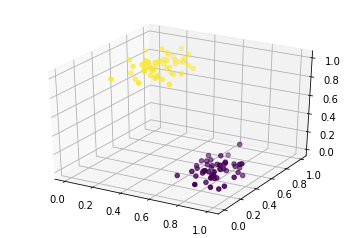

In [14]:
fit = plt.figure()
ax = fit.add_subplot(111,projection="3d")
ax.scatter(data_x,data_y,data_z,c = data[1])

In [15]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [16]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [17]:
learning_rate = 0.01

In [18]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [19]:
hidden = fully_connected(X,num_hidden,activation_fn=None)
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [20]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [22]:
init = tf.global_variables_initializer()

In [23]:
num_iteration = 1000
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_iteration):
        sess.run(train,feed_dict={X:scaled_data})
    
    output_2d = hidden.eval(feed_dict={X:scaled_data})

In [24]:
output_2d

array([[-0.19943039,  0.292851  ],
       [-0.18279497,  0.29290065],
       [ 0.33489305, -0.8489395 ],
       [-0.05800962,  0.2829059 ],
       [ 0.5834734 , -0.79039085],
       [-0.2956435 ,  0.32805315],
       [-0.32100755,  0.26545307],
       [-0.23391052,  0.30853602],
       [ 0.6501707 , -0.6846776 ],
       [ 0.40670484, -0.8994169 ],
       [ 0.40396774, -0.79456455],
       [-0.1615322 ,  0.22941443],
       [ 0.01762673,  0.25623414],
       [-0.21629338,  0.13645765],
       [-0.1888703 ,  0.12933454],
       [ 0.05844235,  0.22962284],
       [ 0.00525167,  0.41370422],
       [ 0.3999068 , -0.86617625],
       [-0.02771738,  0.42078587],
       [-0.02864455,  0.31656173],
       [-0.00886051,  0.32241514],
       [ 0.47178993, -0.9730612 ],
       [-0.06012844,  0.25677714],
       [-0.11427425,  0.27395085],
       [ 0.1492101 , -1.0379884 ],
       [ 0.501896  , -0.7443375 ],
       [-0.2953558 ,  0.3473429 ],
       [ 0.29891342, -0.8170859 ],
       [ 0.30224586,

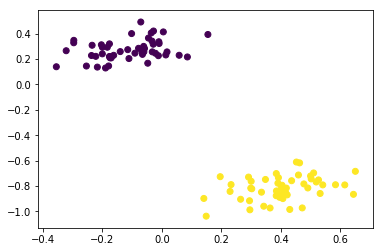

In [26]:
plt.scatter(output_2d[:,0],output_2d[:,1],c = data[1])